In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor,plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv(r"C:\Users\gandl\Documents\ML Algo Implementation\ML algorithms\Linear Regression\Linear Regression on Ice Cream Data Set\Ice_Cream _Sales_temperatures.csv")

In [6]:
data

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
...,...,...
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91


# Gradient Boosting:

At the first weak learner only measures the mean of the data(In case of regression)

#### MODEL-1

In [9]:
data["pred1(mean)"] = data["Temperature"].mean() #MODEL 1 

In [13]:
data

,Temperature,Ice Cream Profits,pred1(mean)
0,39,13.17,71.980822
1,40,11.88,71.980822
2,41,18.82,71.980822
3,42,18.65,71.980822
4,43,17.02,71.980822
...,...,...,...
360,99,85.13,71.980822
361,99,87.08,71.980822
362,99,89.29,71.980822
363,101,81.91,71.980822


In [15]:
# Now we will calucculate the recidual of the of the model-1
data["residual_1"] = data["Ice Cream Profits"] - data["pred1(mean)"]

In [16]:
data

,Temperature,Ice Cream Profits,pred1(mean),residual_1
0,39,13.17,71.980822,-58.810822
1,40,11.88,71.980822,-60.100822
2,41,18.82,71.980822,-53.160822
3,42,18.65,71.980822,-53.330822
4,43,17.02,71.980822,-54.960822
...,...,...,...,...
360,99,85.13,71.980822,13.149178
361,99,87.08,71.980822,15.099178
362,99,89.29,71.980822,17.309178
363,101,81.91,71.980822,9.929178


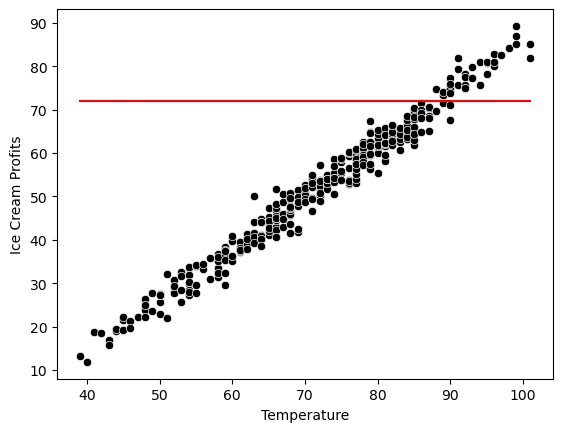

In [23]:
sns.scatterplot(x = data["Temperature"],y = data["Ice Cream Profits"],c = "black")
sns.lineplot(x = data["Temperature"] , y = data["pred1(mean)"],c = "red")
plt.show()

Now we will learn the using the recidual of the previous model.

In [25]:
dt1 = DecisionTreeRegressor(max_leaf_nodes = 8)

In [28]:
dt1.fit(np.array(data["Temperature"]).reshape(-1,1),np.array(data["residual_1"]).reshape(-1,1))

DecisionTreeRegressor(max_leaf_nodes=8)

In [31]:
data["pred2(model-2)"] = dt1.predict(np.array(data["Temperature"]).reshape(-1,1))

In [32]:
data

,Temperature,Ice Cream Profits,pred1(mean),residual_1,pred2(model-2)
0,39,13.17,71.980822,-58.810822,-51.639822
1,40,11.88,71.980822,-60.100822,-51.639822
2,41,18.82,71.980822,-53.160822,-51.639822
3,42,18.65,71.980822,-53.330822,-51.639822
4,43,17.02,71.980822,-54.960822,-51.639822
...,...,...,...,...,...
360,99,85.13,71.980822,13.149178,8.670378
361,99,87.08,71.980822,15.099178,8.670378
362,99,89.29,71.980822,17.309178,8.670378
363,101,81.91,71.980822,9.929178,8.670378


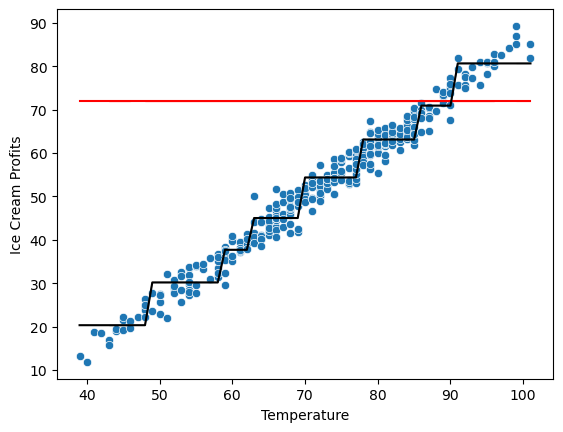

In [46]:
sns.scatterplot(x = data["Temperature"],y = data["Ice Cream Profits"])
sns.lineplot(x = data["Temperature"] , y = data["pred1(mean)"],c = "red")
sns.lineplot(x = data["Temperature"] , y = (data["pred1(mean)"] + 1*data["pred2(model-2)"]),c = "black")

plt.show()

In [51]:
data["residual_2"] = data["Ice Cream Profits"] - (data["pred2(model-2)"] + data["pred1(mean)"])
data

,Temperature,Ice Cream Profits,pred1(mean),residual_1,pred2(model-2),residual_2
0,39,13.17,71.980822,-58.810822,-51.639822,-7.1710
1,40,11.88,71.980822,-60.100822,-51.639822,-8.4610
2,41,18.82,71.980822,-53.160822,-51.639822,-1.5210
3,42,18.65,71.980822,-53.330822,-51.639822,-1.6910
4,43,17.02,71.980822,-54.960822,-51.639822,-3.3210
...,...,...,...,...,...,...
360,99,85.13,71.980822,13.149178,8.670378,4.4788
361,99,87.08,71.980822,15.099178,8.670378,6.4288
362,99,89.29,71.980822,17.309178,8.670378,8.6388
363,101,81.91,71.980822,9.929178,8.670378,1.2588


In [52]:
dt2 = DecisionTreeRegressor(max_leaf_nodes = 8)
dt2.fit(np.array(data["Temperature"]).reshape(-1,1),np.array(data["residual_2"] + data["pred1(mean)"]).reshape(-1,1))

DecisionTreeRegressor(max_leaf_nodes=8)

In [56]:
data["pred_3(model-3)"] = dt2.predict(np.array(data["Temperature"]).reshape(-1,1))
data

,Temperature,Ice Cream Profits,pred1(mean),residual_1,pred2(model-2),residual_2,pred_3(model-3)
0,39,13.17,71.980822,-58.810822,-51.639822,-7.1710,64.164822
1,40,11.88,71.980822,-60.100822,-51.639822,-8.4610,64.164822
2,41,18.82,71.980822,-53.160822,-51.639822,-1.5210,72.087890
3,42,18.65,71.980822,-53.330822,-51.639822,-1.6910,72.087890
4,43,17.02,71.980822,-54.960822,-51.639822,-3.3210,72.087890
...,...,...,...,...,...,...,...
360,99,85.13,71.980822,13.149178,8.670378,4.4788,76.754622
361,99,87.08,71.980822,15.099178,8.670378,6.4288,76.754622
362,99,89.29,71.980822,17.309178,8.670378,8.6388,76.754622
363,101,81.91,71.980822,9.929178,8.670378,1.2588,76.754622


<Axes: xlabel='Temperature', ylabel='Ice Cream Profits'>

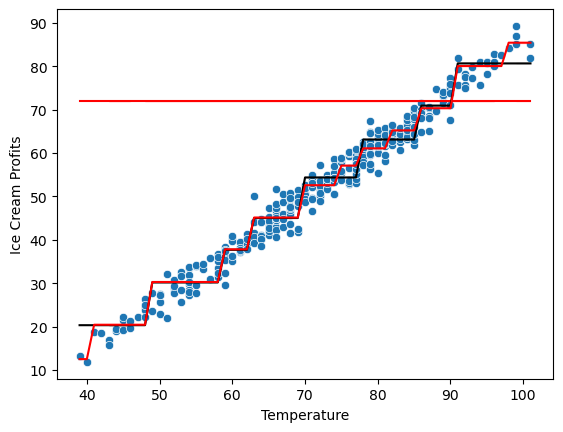

In [59]:
sns.scatterplot(x = data["Temperature"],y = data["Ice Cream Profits"])
sns.lineplot(x = data["Temperature"] , y = data["pred1(mean)"],c = "red")
sns.lineplot(x = data["Temperature"] , y = (data["pred1(mean)"] + 1*data["pred2(model-2)"]),c = "black")
sns.lineplot(x = data["Temperature"] , y = (1*data["pred_3(model-3)"] + data["pred2(model-2)"]),c = "red")